In [65]:
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'C:\Users\David Hilbert\JupyterNotebook Projects\Соревнование\train.csv')
df_test = pd.read_csv(r'C:\Users\David Hilbert\JupyterNotebook Projects\Соревнование\test.csv')

In [66]:
df = df.drop(['relative_date_number', 'g2', 'g1', 'id', 'index' ], axis=1)
df_t = df_test.drop(['relative_date_number', 'g2', 'g1', 'id' ], axis=1)

In [67]:
from sklearn.preprocessing import PolynomialFeatures

# исходные признаки для тренировки
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12']

# --- На этапе обучения (Train) ---
X_train = df[features]

# Создаем и обучаем объект PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)

# Создаем DataFrame с признаками для тренировочных данных
feature_names = poly.get_feature_names_out(features)
df_train_new_features = pd.DataFrame(X_train_poly, columns=feature_names, index=df.index)

# объединяем с исходным датафреймом
df_train_extended = pd.concat([df, df_train_new_features], axis=1)

# --- На этапе тестирования (Test) ---
# Предположим, у вас есть тестовый DataFrame `df_test`
X_test = df_t[features]

# Применяем тот же объект poly к тестовым данным
X_test_poly = poly.transform(X_test)

# Создаем DataFrame с признаками для тестовых данных
df_test_new_features = pd.DataFrame(X_test_poly, columns=feature_names, index=df_t.index)

# Теперь добавляем признаки к тестовому датафрейму или используете отдельно
df_test_extended = pd.concat([df_t, df_test_new_features], axis=1)

In [68]:
df_train_extended

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x10^3,x10^2 x11,x10^2 x12,x10 x11^2,x10 x11 x12,x10 x12^2,x11^3,x11^2 x12,x11 x12^2,x12^3
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.000001,0.000005,0.000016,0.000008,4.501503e-07,0.0,...,1.833256e-17,6.546111e-16,6.952625e-12,2.337457e-14,2.482613e-10,0.000003,8.346489e-13,8.864805e-09,0.000094,1.0
4,0.0,0.0,0.0,0.0,0.000003,0.000005,0.000047,0.000025,4.051353e-06,0.0,...,1.589167e-17,4.463499e-16,6.320910e-12,1.253665e-14,1.775357e-10,0.000003,3.521175e-13,4.986453e-09,0.000071,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391645,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
391646,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
391647,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0
391648,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0


In [69]:
from imblearn.under_sampling import RandomUnderSampler


X = df_train_extended.drop('y', axis=1)  # все признаки
y = df_train_extended['y']                 # целевой признак

# Создаем объект стабилизации
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # 'auto' уменьшит больший класс

# Обучаем и применяем USC
X_resampled, y_resampled = rus.fit_resample(X, y)

# Восстановите DataFrame, если нужно:
df_train_resampled = pd.concat([X_resampled, y_resampled], axis=1)

In [94]:
df_train_resampled

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x10^2 x11,x10^2 x12,x10 x11^2,x10 x11 x12,x10 x12^2,x11^3,x11^2 x12,x11 x12^2,x12^3,y
334357,0.000000,0.000000,0.000000,0.000031,1.665886e-04,0.000000,0.000025,0.000005,0.000000,0.000159,...,5.335283e-12,2.518491e-08,7.122039e-12,3.361919e-08,0.000159,9.507170e-12,4.487807e-08,0.000212,1.0,0.0
179932,0.000404,0.001760,0.001424,0.001347,2.096315e-03,0.000921,0.001470,0.000606,0.001688,0.002208,...,1.732563e-08,4.874584e-06,2.789150e-08,7.847301e-06,0.002208,4.490086e-08,1.263290e-05,0.003554,1.0,0.0
345095,0.000000,0.000000,0.000000,0.000000,9.004791e-07,0.000000,0.000000,0.000000,0.000000,0.000002,...,7.965793e-17,3.384187e-12,1.019240e-15,4.330139e-11,0.000002,1.304139e-14,5.540503e-10,0.000024,1.0,0.0
124227,0.000000,0.000000,0.000000,0.000006,4.502395e-06,0.000031,0.000008,0.000003,0.000000,0.000116,...,3.171668e-13,1.347451e-08,6.431404e-14,2.732317e-09,0.000116,1.304139e-14,5.540503e-10,0.000024,1.0,0.0
36668,0.000004,0.000003,0.000031,0.000053,4.952635e-05,0.000016,0.000041,0.000009,0.000029,0.000029,...,1.980199e-14,8.412675e-10,1.607002e-14,6.827185e-10,0.000029,1.304139e-14,5.540503e-10,0.000024,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391259,0.000151,0.000104,0.001115,0.000914,7.005727e-04,0.000968,0.001018,0.001226,0.001259,0.001699,...,5.842112e-09,2.886003e-06,6.961367e-09,3.438915e-06,0.001699,8.295053e-09,4.097756e-06,0.002024,1.0,1.0
391260,0.000163,0.000078,0.001176,0.000882,7.203832e-04,0.001109,0.001010,0.001284,0.001087,0.001507,...,4.703879e-09,2.270905e-06,6.465677e-09,3.121452e-06,0.001507,8.887340e-09,4.290565e-06,0.002071,1.0,1.0
391261,0.000110,0.000058,0.000805,0.000839,6.609516e-04,0.001062,0.000969,0.001736,0.001144,0.001392,...,4.607189e-09,1.937939e-06,7.867956e-09,3.309527e-06,0.001392,1.343655e-08,5.651867e-06,0.002377,1.0,1.0
391642,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.521175e-13,4.986453e-09,0.000071,1.0,1.0


In [70]:
from sklearn.model_selection import train_test_split

X = df_train_resampled.drop('y', axis=1)
y = df_train_resampled['y']

X.columns = [f'feature_{i}' for i in range(X.shape[1])]

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [71]:
from catboost import CatBoostClassifier

binary_y = (y_train == 1).astype(int)
model_detector = CatBoostClassifier()
model_detector.fit(X_train, binary_y)

Learning rate set to 0.041028
0:	learn: 0.6687849	total: 43.9ms	remaining: 43.9s
1:	learn: 0.6493955	total: 88ms	remaining: 43.9s
2:	learn: 0.6340812	total: 132ms	remaining: 44s
3:	learn: 0.6219323	total: 181ms	remaining: 45.2s
4:	learn: 0.6124379	total: 228ms	remaining: 45.3s
5:	learn: 0.6051679	total: 273ms	remaining: 45.2s
6:	learn: 0.5994186	total: 319ms	remaining: 45.2s
7:	learn: 0.5979539	total: 365ms	remaining: 45.2s
8:	learn: 0.5964992	total: 410ms	remaining: 45.1s
9:	learn: 0.5949956	total: 454ms	remaining: 45s
10:	learn: 0.5906918	total: 497ms	remaining: 44.7s
11:	learn: 0.5894256	total: 541ms	remaining: 44.6s
12:	learn: 0.5859740	total: 584ms	remaining: 44.3s
13:	learn: 0.5831876	total: 627ms	remaining: 44.2s
14:	learn: 0.5823241	total: 673ms	remaining: 44.2s
15:	learn: 0.5799939	total: 722ms	remaining: 44.4s
16:	learn: 0.5791347	total: 769ms	remaining: 44.5s
17:	learn: 0.5783730	total: 815ms	remaining: 44.4s
18:	learn: 0.5767142	total: 860ms	remaining: 44.4s
19:	learn: 0.57

In [72]:
preds_detector = model_detector.predict(X_test)

In [73]:
from sklearn.metrics import classification_report, confusion_matrix

y_test_binary = (y_test == 1).astype(int)

# Предсказания вероятностей (чтобы выбрать порог, например 0.5)
preds_probs = model_detector.predict_proba(X_test)[:, 1]

# Бинарные предсказания по порогу 0.5
preds_binary = (preds_probs >= 0.5).astype(int)

# Метрики
print(classification_report(y_test_binary, preds_binary))

              precision    recall  f1-score   support

           0       0.79      0.57      0.66      5451
           1       0.66      0.85      0.75      5451

    accuracy                           0.71     10902
   macro avg       0.73      0.71      0.70     10902
weighted avg       0.73      0.71      0.70     10902



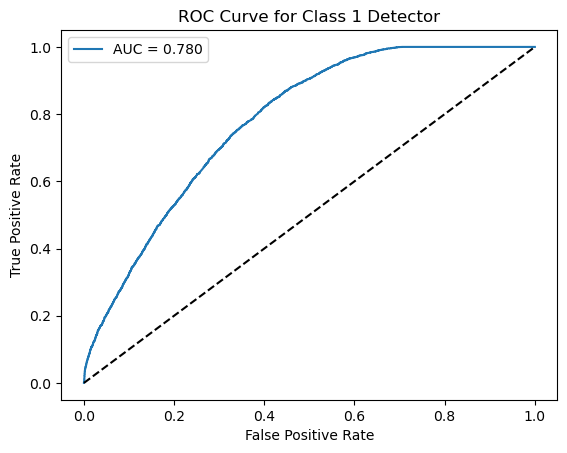

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test_binary, preds_probs)
auc_score = roc_auc_score(y_test_binary, preds_probs)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class 1 Detector')
plt.legend()
plt.show()

In [75]:
df_test_extended.columns = [f'feature_{i}' for i in range(df_test_extended.shape[1])]

In [76]:
# Предсказания вероятностей (чтобы выбрать порог, например 0.5)
preds_probs = model_detector.predict_proba(df_test_extended)[:, 1]

# Бинарные предсказания по порогу 0.5
preds_binary = (preds_probs >= 0.5).astype(int)

In [92]:
df_test_new = df_test.drop(['relative_date_number', 'g2', 'g1', 'x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12' ], axis=1)

df_test_new['y'] = preds_binary

# Сохраняем в файл
df_test_new.to_csv('test_predictions_5.csv', index=False)